In [0]:
pip install mlflow

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install hyperopt

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
import mlflow
import numpy as np
import pandas as pd
import sklearn.datasets
import sklearn.metrics
import sklearn.model_selection
import sklearn.ensemble
from sklearn.metrics import roc_curve, auc

from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK
from hyperopt.pyll import scope
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [0]:
from pyspark.sql.functions import year, month, dayofmonth, regexp_extract
from pyspark.sql.types import FloatType
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [0]:
# File location and type
file_location = "/FileStore/tables/NYPD_Complaint_Data_Historic__1_-3.csv"
file_type = "csv"

# CSV options
infer_schema = "True"
first_row_is_header = "True"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
crime_df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(crime_df)

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM ADDR_PCT_CD RPT_DT KY_CD OFNS_DESC PD_CD PD_DESC CRM_ATPT_CPTD_CD LAW_CAT_CD BORO_NM LOC_OF_OCCUR_DESC PREM_TYP_DESC JURIS_DESC JURISDICTION_CODE PARKS_NM HADEVELOPT HOUSING_PSA X_COORD_CD Y_COORD_CD SUSP_AGE_GROUP SUSP_RACE SUSP_SEX TRANSIT_DISTRICT Latitude Longitude Lat_Lon PATROL_BORO STATION_NAME VIC_AGE_GROUP VIC_RACE VIC_SEX Zip Codes Community Districts Borough Boundaries City Council Districts Police Precincts 824506872 2018-01-02 2023-05-14T00:15:00.000+0000 null null 44 2019-01-02 117 DANGEROUS DRUGS 503 CONTROLLED SUBSTANCE,INTENT TO COMPLETED FELONY BRONX FRONT OF STREET N.Y. POLICE DEPT 0 null null null 1006884 241291 18-24 BLACK HISPANIC M null 40.82894276600007 -73.91821480499993 (40.82894276600007, -73.91821480499993) PATROL BORO BRONX null UNKNOWN UNKNOWN E 10934 50 5 42 27 225800158 2018-01-02 2023-05-14T21:00:00.000+0000 2018-05-26 21:00:00 18 2019-08-19 116 SEX CRIMES 596 OBSCENE MATERIAL - UNDER 17 YE COMPLETED FELONY MANHATTAN INSIDE RESIDENCE - APT. HOUSE N.Y. POLICE DEPT 0 null null null 988353 217918 UNKNOWN WHITE HISPANIC M null 40.764818269000045 -73.98518977299993 (40.764818269000045, -73.98518977299993) PATROL BORO MAN SOUTH null 25-44 WHITE F 12081 12 4 10 10 679885300 2018-01-02 2023-05-14T00:01:00.000+0000 2019-04-03 00:01:00 9 2019-07-01 340 FRAUDS 718 FRAUD,UNCLASSIFIED-MISDEMEANOR COMPLETED MISDEMEANOR MANHATTAN INSIDE RESIDENCE - APT. HOUSE N.Y. POLICE DEPT 0 null null null 989955 202021 UNKNOWN UNKNOWN M null 40.721184076000036 -73.97942009399996 (40.721184076000036, -73.97942009399996) PATROL BORO MAN SOUTH null 25-44 WHITE HISPANIC F 11729 70 4 50 5 115962430 2018-01-02 2023-05-14T12:00:00.000+0000 null null 26 2019-04-02 233 SEX CRIMES 175 SEXUAL ABUSE 3,2 ATTEMPTED MISDEMEANOR MANHATTAN INSIDE RESIDENCE - APT. HOUSE N.Y. POLICE DEPT 0 null null null 996241 236149 <18 WHITE M null 40.81485028900005 -73.95668184799997 (40.81485028900005, -73.95668184799997) PATROL BORO MAN NORTH null <18 WHITE HISPANIC F 12424 37 4 23 17 701594098 2018-01-02 2023-05-14T00:01:00.000+0000 2019-03-11 15:00:00 123 2019-03-12 361 OFF. AGNST PUB ORD SENSBLTY & 639 AGGRAVATED HARASSMENT 2 COMPLETED MISDEMEANOR STATEN ISLAND INSIDE STORE UNCLASSIFIED N.Y. POLICE DEPT 0 null null null 917619 135515 45-64 WHITE HISPANIC M null 40.538390763000045 -74.23972218499993 (40.538390763000045, -74.23972218499993) PATROL BORO STATEN ISLAND null 65+ WHITE M 10696 15 1 9 77 867452524 2018-01-02 2023-05-14T07:30:00.000+0000 2019-03-11 22:30:00 108 2019-03-13 578 HARRASSMENT 2 637 HARASSMENT,SUBD 1,CIVILIAN COMPLETED VIOLATION QUEENS null GYM/FITNESS FACILITY N.Y. POLICE DEPT 0 null null null 996424 210017 UNKNOWN UNKNOWN M null 40.743124599000055 -73.95606807299998 (40.743124599000055, -73.95606807299998) PATROL BORO QUEENS NORTH null 25-44 ASIAN / PACIFIC ISLANDER F 16858 53 3 33 66 824559281 2018-01-02 2023-05-14T10:00:00.000+0000 2019-02-25 10:00:00 24 2019-02-25 109 GRAND LARCENY 432 LARCENY,GRAND BY IDENTITY THEFT-UNCLASSIFIED COMPLETED FELONY MANHATTAN INSIDE RESIDENCE - APT. HOUSE N.Y. POLICE DEPT 0 null null null 992410 226636 UNKNOWN UNKNOWN U null 40.78874407400008 -73.97053356999999 (40.78874407400008, -73.97053356999999) PATROL BORO MAN NORTH null 65+ BLACK F 12421 20 4 19 15 986095164 2018-01-02 2023-05-14T10:00:00.000+0000 2018-12-18 17:30:00 71 2019-02-08 109 GRAND LARCENY 420 LARCENY,GRAND BY OPEN/COMPROMISE CELL PHONE ACCT COMPLETED FELONY BROOKLYN INSIDE RESIDENCE-HOUSE N.Y. POLICE DEPT 0 null null null 1002990 180464 null null null null 40.66199708700003 -73.93245501699994 (40.66199708700003, -73.93245501699994) PATROL BORO BKLYN SOUTH null 45-64 BLACK F 16866 17 2 17 44 533461424 2018-01-02 2023-05-14T16:30:00.000+0000 null null 5 2019-01-02 353 UNAUTHORIZED USE OF A VEHICLE 462 UNAUTHORIZED USE VEHICLE 3 COMPLETED MISDEMEANOR MANHATTAN null STREET N.Y. POLICE DEPT 0 null null null 984103 201020 25-44 WHITE M null 40.71843841000003 -74.000531741

In [0]:
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame
nypd_short_pandas = crime_df.toPandas()





In [0]:
# Rename the Pandas DataFrame as "df"
df = nypd_short_pandas

In [0]:
df.isna().sum()

Out[6]: CMPLNT_NUM                      0
CMPLNT_FR_DT                    0
CMPLNT_FR_TM                    0
CMPLNT_TO_DT               238493
CMPLNT_TO_TM               198680
ADDR_PCT_CD                    40
RPT_DT                          0
KY_CD                           0
OFNS_DESC                      32
PD_CD                        2077
PD_DESC                      1508
CRM_ATPT_CPTD_CD              161
LAW_CAT_CD                      0
BORO_NM                      2209
LOC_OF_OCCUR_DESC          306089
PREM_TYP_DESC                6125
JURIS_DESC                      0
JURISDICTION_CODE            1508
PARKS_NM                  1756561
HADEVELOPT                1724144
HOUSING_PSA               1641296
X_COORD_CD                     48
Y_COORD_CD                     48
SUSP_AGE_GROUP             404924
SUSP_RACE                  404924
SUSP_SEX                   404924
TRANSIT_DISTRICT          2249724
Latitude                       48
Longitude                      48
Lat_Lo

In [0]:
selected_features = ["CMPLNT_NUM", "CMPLNT_FR_DT", "OFNS_DESC", "KY_CD", "CRM_ATPT_CPTD_CD", "LAW_CAT_CD", "BORO_NM", "JURISDICTION_CODE", "SUSP_AGE_GROUP", "SUSP_RACE", "SUSP_SEX", "VIC_AGE_GROUP", "VIC_RACE", "VIC_SEX", "Zip Codes", "Community Districts", "Borough Boundaries", "City Council Districts", "Police Precincts"]
df1 = df[selected_features]

In [0]:
df = df1

In [0]:
# Drop rows with missing values 2
df = df.dropna()

In [0]:
len(df.index)

Out[10]: 1890329

In [0]:
#cleaning data with negative age
df = df.query("CMPLNT_NUM not in ('370939316' ,'568168312','958886732','964823569','183975116','602663350','746798394','180028258','237942604','561008214','684883394','282077562','808755560','531053349','996996638','196750853','850883945','448358721','915796065','770470346','376518927','752749208','843244934','472775653','694476752','980977588','112340764','953156860','862200483','370963717','946280076','148181985','114405295','132871472','982540098','438042904','324634635','233685975','949663789','879727252','621878192','239842349','239483761','243597985','243171015','244442112','246153037','247398623','247898348','250043129','250174328','250275108','252304746','253907383','253749348','255012554','261179627')")

In [0]:
#cleaning other age data removing the values which does not make sense
df = df.query("SUSP_AGE_GROUP not in ('938','1012','924','928','(null)','2018','-978','948','1017','1967','-939','UNKNOWN','1018','952','922','-63','954','-2','920','-1','940','2019','-941','-973','-80','929','955','1019','-974','947','-966','-64','-968','930','-964','-71','-942','2020','-965','-928','1925','-12','-977','-947','2021','1020','-975','-962','1056','1032','953','-946','-969','-971','-69','-955','942','-74','-961','-10','2022','-60','-33','-5962','-6','-55','951','-66','1822','-951','-65','-47','-3','-76','956')")

In [0]:
len(df.index)

Out[13]: 1023503

In [0]:
df['SUSP_AGE_GROUP'].value_counts()

Out[14]: 25-44    578097
45-64    204582
18-24    173933
<18       46674
65+       20217
Name: SUSP_AGE_GROUP, dtype: int64

In [0]:
# taking the average of age group instead of between which is better for the model
df['SUSP_AGE_GROUP'].replace(['25-44'], ['34'], inplace = True)
df['SUSP_AGE_GROUP'].replace(['45-64'], ['54'], inplace = True)
df['SUSP_AGE_GROUP'].replace(['18-24'], ['21'], inplace = True)
df['SUSP_AGE_GROUP'].replace(['<18'], ['16'], inplace = True)
df['SUSP_AGE_GROUP'].replace(['65+'], ['70'], inplace = True)

In [0]:
df['SUSP_AGE_GROUP'].value_counts()

Out[16]: 34    578097
54    204582
21    173933
16     46674
70     20217
Name: SUSP_AGE_GROUP, dtype: int64

In [0]:
#no need to clean
df['SUSP_SEX'].value_counts()

Out[17]: M    776012
F    225447
U     22044
Name: SUSP_SEX, dtype: int64

In [0]:
df['SUSP_SEX'].replace(['U'], ['F'], inplace = True)

In [0]:
#looks good no need to change
df['SUSP_RACE'].value_counts()

Out[19]: BLACK                             488346
WHITE HISPANIC                    235309
WHITE                             126976
BLACK HISPANIC                     75292
ASIAN / PACIFIC ISLANDER           53621
UNKNOWN                            40401
AMERICAN INDIAN/ALASKAN NATIVE      3558
Name: SUSP_RACE, dtype: int64

In [0]:
df['BORO_NM'].value_counts()

Out[20]: BROOKLYN         281417
MANHATTAN        247072
BRONX            242790
QUEENS           208104
STATEN ISLAND     44078
(null)               42
Name: BORO_NM, dtype: int64

In [0]:
df[df['BORO_NM'] == '(null)']

CMPLNT_NUM 
 CMPLNT_FR_DT 
 OFNS_DESC 
 KY_CD 
 CRM_ATPT_CPTD_CD 
 LAW_CAT_CD 
 BORO_NM 
 JURISDICTION_CODE 
 SUSP_AGE_GROUP 
 SUSP_RACE 
 SUSP_SEX 
 VIC_AGE_GROUP 
 VIC_RACE 
 VIC_SEX 
 Zip Codes 
 Community Districts 
 Borough Boundaries 
 City Council Districts 
 Police Precincts 
 
 
 
 
 1790741 
 238871010 
 2022-01-09 
 OFFENSES AGAINST PUBLIC ADMINI 
 359 
 COMPLETED 
 MISDEMEANOR 
 (null) 
 1.0 
 34 
 BLACK 
 M 
 25-44 
 BLACK 
 F 
 16860.0 
 39.0 
 3.0 
 4.0 
 72.0 
 
 
 1808647 
 239548076 
 2022-01-23 
 DANGEROUS WEAPONS 
 236 
 COMPLETED 
 MISDEMEANOR 
 (null) 
 1.0 
 54 
 BLACK 
 M 
 UNKNOWN 
 UNKNOWN 
 E 
 12428.0 
 37.0 
 4.0 
 23.0 
 19.0 
 
 
 1829884 
 240379100 
 2022-02-09 
 ASSAULT 3 & RELATED OFFENSES 
 344 
 COMPLETED 
 MISDEMEANOR 
 (null) 
 1.0 
 34 
 BLACK 
 F 
 18-24 
 WHITE HISPANIC 
 F 
 13093.0 
 7.0 
 4.0 
 36.0 
 16.0 
 
 
 1834616 
 240487409 
 2022-02-12 
 CRIMINAL MISCHIEF & RELATED OF 
 351 
 COMPLETED 
 MISDEMEANOR 
 (null) 
 1.0 
 34 
 BLACK 
 M 
 UNKNOWN 
 UNKNOWN 
 D 
 12073.0 
 71.0 
 4.0 
 50.0 
 7.0 
 
 
 1838064 
 240733895 
 2022-02-15 
 HARRASSMENT 2 
 578 
 COMPLETED 
 VIOLATION 
 (null) 
 1.0 
 34 
 BLACK HISPANIC 
 M 
 25-44 
 WHITE 
 F 
 12426.0 
 7.0 
 4.0 
 35.0 
 14.0 
 
 
 1845506 
 240981284 
 2022-02-20 
 FELONY ASSAULT 
 106 
 COMPLETED 
 FELONY 
 (null) 
 1.0 
 34 
 BLACK 
 M 
 65+ 
 WHITE 
 M 
 12076.0 
 70.0 
 4.0 
 32.0 
 2.0 
 
 
 1849098 
 241119066 
 2022-02-23 
 PETIT LARCENY 
 341 
 COMPLETED 
 MISDEMEANOR 
 (null) 
 0.0 
 16 
 BLACK 
 F 
 25-44 
 WHITE HISPANIC 
 D 
 13094.0 
 11.0 
 4.0 
 51.0 
 8.0 
 
 
 1852055 
 241363170 
 2022-02-25 
 HARRASSMENT 2 
 578 
 COMPLETED 
 VIOLATION 
 (null) 
 1.0 
 34 
 BLACK 
 M 
 45-64 
 WHITE 
 M 
 13093.0 
 7.0 
 4.0 
 36.0 
 16.0 
 
 
 1854012 
 241320161 
 2022-02-27 
 ASSAULT 3 & RELATED OFFENSES 
 344 
 COMPLETED 
 MISDEMEANOR 
 (null) 
 1.0 
 21 
 BLACK 
 M 
 45-64 
 WHITE 
 M 
 10090.0 
 23.0 
 4.0 
 51.0 
 11.0 
 
 
 1854338 
 241294511 
 2022-02-27 
 CRIMINAL MISCHIEF & RELATED OF 
 121 
 COMPLETED 
 FELONY 
 (null) 
 1.0 
 34 
 BLACK 
 M 
 UNKNOWN 
 UNKNOWN 
 D 
 11723.0 
 70.0 
 4.0 
 32.0 
 4.0 
 
 
 1859828 
 241559308 
 2022-03-03 
 ASSAULT 3 & RELATED OFFENSES 
 344 
 COMPLETED 
 MISDEMEANOR 
 (null) 
 1.0 
 34 
 BLACK 
 M 
 45-64 
 WHITE 
 M 
 12076.0 
 70.0 
 4.0 
 32.0 
 2.0 
 
 
 1907594 
 243162806 
 2022-04-06 
 BURGLAR'S TOOLS 
 231 
 COMPLETED 
 MISDEMEANOR 
 (null) 
 1.0 
 54 
 BLACK 
 M 
 UNKNOWN 
 UNKNOWN 
 E 
 12080.0 
 12.0 
 4.0 
 10.0 
 8.0 
 
 
 1922111 
 243771668 
 2022-04-16 
 HARRASSMENT 2 
 578 
 COMPLETED 
 VIOLATION 
 (null) 
 1.0 
 34 
 BLACK 
 M 
 25-44 
 WHITE HISPANIC 
 F 
 11724.0 
 70.0 
 4.0 
 50.0 
 5.0 
 
 
 1923674 
 243776373 
 2022-04-17 
 ASSAULT 3 & RELATED OFFENSES 
 344 
 COMPLETED 
 MISDEMEANOR 
 (null) 
 1.0 
 34 
 BLACK 
 F 
 25-44 
 BLACK HISPANIC 
 F 
 12080.0 
 12.0 
 4.0 
 10.0 
 8.0 
 
 
 1925000 
 243815816 
 2022-04-18 
 HARRASSMENT 2 
 578 
 COMPLETED 
 VIOLATION 
 (null) 
 1.0 
 34 
 WHITE 
 M 
 25-44 
 WHITE 
 F 
 12080.0 
 12.0 
 4.0 
 10.0 
 8.0 
 
 
 1933257 
 244091410 
 2022-04-24 
 OFF. AGNST PUB ORD SENSBLTY & 
 361 
 COMPLETED 
 MISDEMEANOR 
 (null) 
 0.0 
 34 
 BLACK 
 M 
 18-24 
 BLACK 
 F 
 12427.0 
 18.0 
 4.0 
 36.0 
 20.0 
 
 
 1952063 
 244703739 
 2022-05-07 
 MISCELLANEOUS PENAL LAW 
 126 
 COMPLETED 
 FELONY 
 (null) 
 1.0 
 54 
 BLACK 
 M 
 UNKNOWN 
 UNKNOWN 
 E 
 12424.0 
 18.0 
 4.0 
 36.0 
 18.0 
 
 
 1958777 
 244945730 
 2022-05-12 
 GRAND LARCENY 
 109 
 COMPLETED 
 FELONY 
 (null) 
 1.0 
 34 
 UNKNOWN 
 M 
 25-44 
 ASIAN / PACIFIC ISLANDER 
 M 
 18182.0 
 36.0 
 2.0 
 38.0 
 57.0 
 
 
 1960595 
 245001212 
 2022-05-13 
 HARRASSMENT 2 
 578 
 COMPLETED 
 VIOLATION 
 (null) 
 1.0 
 34 
 BLACK 
 M 
 45-64 
 WHITE HISPANIC 
 M 
 12073.0 
 71.0 
 4.0 
 50.0 
 7.0 
 
 
 1962012 
 245034136 
 2022-05-14 
 HARRASSMENT 2 
 578 
 COMPLETED 
 VIOLATION 
 (null) 
 1.0 
 34 
 BLACK 
 M 
 <18 
 WHITE HISPANIC 
 M 
 11723.0 
 70.0 
 4.0 
 32.0 


In [0]:
df['Zip Codes'] = df['Zip Codes'].astype(int)

In [0]:
display(df.BORO_NM[df['Zip Codes'] == 16860])
display(df.BORO_NM[df['Zip Codes'] == 12428])
display(df.BORO_NM[df['Zip Codes'] == 13093])
display(df.BORO_NM[df['Zip Codes'] == 12073])
display(df.BORO_NM[df['Zip Codes'] == 12426])
display(df.BORO_NM[df['Zip Codes'] == 12076])
display(df.BORO_NM[df['Zip Codes'] == 13093])
display(df.BORO_NM[df['Zip Codes'] == 10090])
display(df.BORO_NM[df['Zip Codes'] == 11723])
display(df.BORO_NM[df['Zip Codes'] == 12076])
display(df.BORO_NM[df['Zip Codes'] == 12080])
display(df.BORO_NM[df['Zip Codes'] == 11724])
display(df.BORO_NM[df['Zip Codes'] == 12080])
display(df.BORO_NM[df['Zip Codes'] == 12080])
display(df.BORO_NM[df['Zip Codes'] == 12424])
display(df.BORO_NM[df['Zip Codes'] == 18182])
display(df.BORO_NM[df['Zip Codes'] == 12073])
display(df.BORO_NM[df['Zip Codes'] == 11723])
display(df.BORO_NM[df['Zip Codes'] == 12424])
display(df.BORO_NM[df['Zip Codes'] == 24340])
display(df.BORO_NM[df['Zip Codes'] == 12077])
display(df.BORO_NM[df['Zip Codes'] == 12074])
display(df.BORO_NM[df['Zip Codes'] == 13516])
display(df.BORO_NM[df['Zip Codes'] == 13516])
display(df.BORO_NM[df['Zip Codes'] == 12073])
display(df.BORO_NM[df['Zip Codes'] == 10929])
display(df.BORO_NM[df['Zip Codes'] == 13093])
display(df.BORO_NM[df['Zip Codes'] == 13093])
display(df.BORO_NM[df['Zip Codes'] == 17215])
display(df.BORO_NM[df['Zip Codes'] == 13091])
display(df.BORO_NM[df['Zip Codes'] == 11723])
display(df.BORO_NM[df['Zip Codes'] == 17618])
display(df.BORO_NM[df['Zip Codes'] == 12076])
display(df.BORO_NM[df['Zip Codes'] == 17614])
display(df.BORO_NM[df['Zip Codes'] == 13509])
display(df.BORO_NM[df['Zip Codes'] == 13509])
display(df.BORO_NM[df['Zip Codes'] == 18182])
display(df.BORO_NM[df['Zip Codes'] == 11723])
display(df.BORO_NM[df['Zip Codes'] == 12076])

572        QUEENS
1034       QUEENS
1357       QUEENS
2477       QUEENS
3245       QUEENS
            ...  
2298208    QUEENS
2299244    QUEENS
2299695    QUEENS
2300086    QUEENS
2300919    QUEENS
Name: BORO_NM, Length: 4693, dtype: object150        MANHATTAN
364        MANHATTAN
1217       MANHATTAN
1239       MANHATTAN
1836       MANHATTAN
             ...    
2299713    MANHATTAN
2299789    MANHATTAN
2300544    MANHATTAN
2300617    MANHATTAN
2300833    MANHATTAN
Name: BORO_NM, Length: 8261, dtype: object9          MANHATTAN
622        MANHATTAN
992        MANHATTAN
1154       MANHATTAN
1216       MANHATTAN
             ...    
2300565    MANHATTAN
2300692    MANHATTAN
2300787    MANHATTAN
2300932    MANHATTAN
2300979    MANHATTAN
Name: BORO_NM, Length: 13444, dtype: object621        MANHATTAN
1418       MANHATTAN
3153       MANHATTAN
4552       MANHATTAN
5395       MANHATTAN
             ...    
2298326    MANHATTAN
2298945    MANHATTAN
2299294    MANHATTAN
2299860    MANHATTAN
230

In [0]:
#adding the borough name based on zip codes
df.loc[1790741,'BORO_NM'] = 'QUEENS'
df.loc[1808647,'BORO_NM'] = 'MANHATTAN'
df.loc[1829884,'BORO_NM'] = 'MANHATTAN'
df.loc[1834616,'BORO_NM'] = 'MANHATTAN'
df.loc[1838064,'BORO_NM'] = 'MANHATTAN'
df.loc[1845506,'BORO_NM'] = 'MANHATTAN'
df.loc[1852055,'BORO_NM'] = 'MANHATTAN'
df.loc[1854012,'BORO_NM'] = 'MANHATTAN'
df.loc[1854338,'BORO_NM'] = 'MANHATTAN'
df.loc[1859828,'BORO_NM'] = 'MANHATTAN'
df.loc[1907594,'BORO_NM'] = 'MANHATTAN'
df.loc[1922111,'BORO_NM'] = 'MANHATTAN'
df.loc[1923674,'BORO_NM'] = 'MANHATTAN'
df.loc[1925000,'BORO_NM'] = 'MANHATTAN'
df.loc[1952063,'BORO_NM'] = 'MANHATTAN'
df.loc[1958777,'BORO_NM'] = 'BROOKLYN'
df.loc[1960595,'BORO_NM'] = 'MANHATTAN'
df.loc[1962012,'BORO_NM'] = 'MANHATTAN'
df.loc[1979472,'BORO_NM'] = 'MANHATTAN'
df.loc[1999936,'BORO_NM'] = 'QUEENS'
df.loc[2025274,'BORO_NM'] = 'MANHATTAN'
df.loc[2068843,'BORO_NM'] = 'MANHATTAN'
df.loc[2075147,'BORO_NM'] = 'BROOKLYN'
df.loc[2111683,'BORO_NM'] = 'BROOKLYN'
df.loc[2141343,'BORO_NM'] = 'MANHATTAN'
df.loc[2145330,'BORO_NM'] = 'BRONX'
df.loc[2152149,'BORO_NM'] = 'MANHATTAN'
df.loc[2153028,'BORO_NM'] = 'MANHATTAN'
df.loc[2160340,'BORO_NM'] = 'BROOKLYN'
df.loc[2188360,'BORO_NM'] = 'MANHATTAN'
df.loc[2196955,'BORO_NM'] = 'MANHATTAN'
df.loc[2209273,'BORO_NM'] = 'BROOKLYN'
df.loc[2209901,'BORO_NM'] = 'MANHATTAN'
df.loc[2218456,'BORO_NM'] = 'BROOKLYN'
df.loc[2220159,'BORO_NM'] = 'BROOKLYN'
df.loc[2220288,'BORO_NM'] = 'BROOKLYN'
df.loc[2226048,'BORO_NM'] = 'BROOKLYN'
df.loc[2231467,'BORO_NM'] = 'MANHATTAN'
df.loc[2274283,'BORO_NM'] = 'MANHATTAN'

In [0]:
df['BORO_NM'].value_counts()

Out[25]: BROOKLYN         281426
MANHATTAN        247099
BRONX            242791
QUEENS           208106
STATEN ISLAND     44078
(null)                3
Name: BORO_NM, dtype: int64

In [0]:
df['BORO_NM'].replace(['(null)'], ['STATEN ISLAND'], inplace = True)

In [0]:
df.columns

Out[27]: Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'OFNS_DESC', 'KY_CD', 'CRM_ATPT_CPTD_CD',
       'LAW_CAT_CD', 'BORO_NM', 'JURISDICTION_CODE', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
       'Zip Codes', 'Community Districts', 'Borough Boundaries',
       'City Council Districts', 'Police Precincts'],
      dtype='object')

In [0]:
df['JURISDICTION_CODE'].value_counts()

Out[28]: 0.0     888047
2.0      93156
1.0      28216
3.0       5183
97.0      4206
72.0      2285
14.0       574
4.0        500
88.0       458
11.0       394
15.0       240
87.0        54
7.0         43
12.0        33
6.0         32
13.0        31
9.0         17
85.0        17
73.0        15
8.0          2
Name: JURISDICTION_CODE, dtype: int64

In [0]:
df['JURISDICTION_CODE'] = df['JURISDICTION_CODE'].astype(int)

In [0]:
df['VIC_AGE_GROUP'].value_counts()

Out[30]: 25-44      366083
UNKNOWN    298800
45-64      173915
18-24      102391
<18         47364
65+         34895
-2              3
-967            3
-970            3
-5              2
-963            2
936             2
-1              2
-943            2
-955            2
-3              2
970             2
-974            2
-56             2
943             1
-938            1
-31             1
-61             1
938             1
1016            1
949             1
-40             1
950             1
-975            1
-71             1
927             1
-954            1
-942            1
-69             1
951             1
960             1
-934            1
-978            1
-59             1
1017            1
953             1
922             1
-76             1
-958            1
-57             1
Name: VIC_AGE_GROUP, dtype: int64

In [0]:
df = df.query("VIC_AGE_GROUP not in ('-1','970','-55','-940','951','-51','-61','948','-972','936','-43','-956','-968','-948','922','-970','-974','-76','954','-955','-962','-5','-958','-4','938','-59','-966','953','-978','1017','-67','957','965','929','-3','-934','-2','-952','-71','-942','-954','-39','1013','null','-946','-967','-50','-961','-56','927','941','-69','1018','960','-943','956','937','-938','943','950','-963','-31','-965','-935','1016','932','-973','-60','963','-48','949','945','1014','-62','-960','-921','-959','-971','-65','-11','-964','-40','-6','-57','-49','-945','934','-27','-975','946')")

In [0]:
df['VIC_AGE_GROUP'].value_counts()

Out[32]: 25-44      366083
UNKNOWN    298800
45-64      173915
18-24      102391
<18         47364
65+         34895
Name: VIC_AGE_GROUP, dtype: int64

In [0]:
# taking the average of age group instead of between which is better for the model
df['VIC_AGE_GROUP'].replace(['25-44'], ['34'], inplace = True)
df['VIC_AGE_GROUP'].replace(['45-64'], ['54'], inplace = True)
df['VIC_AGE_GROUP'].replace(['18-24'], ['21'], inplace = True)
df['VIC_AGE_GROUP'].replace(['<18'], ['16'], inplace = True)
df['VIC_AGE_GROUP'].replace(['65+'], ['70'], inplace = True)

In [0]:
df['VIC_AGE_GROUP'].value_counts()

Out[34]: 34         366083
UNKNOWN    298800
54         173915
21         102391
16          47364
70          34895
Name: VIC_AGE_GROUP, dtype: int64

In [0]:
#Replacing unknown by the mean of the column victim age

df['VIC_AGE_GROUP'].replace(['UNKNOWN'], ['39'], inplace = True)

In [0]:
#Dropping vic_Race as there are more than half values which is Unknow, if we drop it it will lessen the dataset
df = df.drop('VIC_RACE', axis=1)

In [0]:
df['VIC_SEX'].value_counts()

Out[37]: F    463867
M    279080
D    143029
E    135924
L      1548
Name: VIC_SEX, dtype: int64

In [0]:
# Remove L since it's not in the dataset description (D=Business/Organization, E=PSNY/People of the State of New York, F=Female, M=Male)
df=df.query("VIC_SEX in ('F', 'M', 'D', 'E')")

In [0]:
Num = [features for features in df.columns if df[features].dtypes != 'O'] 

Cat = [features for features in df.columns if df[features].dtypes == 'O']

print('Numerical Variables - ')
print(Num)
print('Categorical Variable - ')
print(Cat)

Numerical Variables - 
['KY_CD', 'JURISDICTION_CODE', 'Zip Codes', 'Community Districts', 'Borough Boundaries', 'City Council Districts', 'Police Precincts']
Categorical Variable - 
['CMPLNT_NUM', 'CMPLNT_FR_DT', 'OFNS_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_SEX']


In [0]:
#converting all the columns as int and encoding it

#dropping Cmplnt_NUM as it is Identity column doesn't derive insights
df = df.drop('CMPLNT_NUM', axis=1)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021900 entries, 0 to 2300985
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   CMPLNT_FR_DT            1021900 non-null  object 
 1   OFNS_DESC               1021900 non-null  object 
 2   KY_CD                   1021900 non-null  int32  
 3   CRM_ATPT_CPTD_CD        1021900 non-null  object 
 4   LAW_CAT_CD              1021900 non-null  object 
 5   BORO_NM                 1021900 non-null  object 
 6   JURISDICTION_CODE       1021900 non-null  int64  
 7   SUSP_AGE_GROUP          1021900 non-null  object 
 8   SUSP_RACE               1021900 non-null  object 
 9   SUSP_SEX                1021900 non-null  object 
 10  VIC_AGE_GROUP           1021900 non-null  object 
 11  VIC_SEX                 1021900 non-null  object 
 12  Zip Codes               1021900 non-null  int64  
 13  Community Districts     1021900 non-null  float64
 14  Bo

In [0]:
#converting date from object to datetime to split the date
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'])

In [0]:
#splitting date column into seperate columns
df['year'] = df['CMPLNT_FR_DT'].dt.year
df['month'] = df['CMPLNT_FR_DT'].dt.month
df['day'] = df['CMPLNT_FR_DT'].dt.day

In [0]:
#converting the column to integer
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

In [0]:
#dropping dropping the column date
df = df.drop('CMPLNT_FR_DT', axis=1)

In [0]:
#saving dataframe 
df1=df

In [0]:
#df=df1

In [0]:
#dropping dropping the column offense desciption as there is law_ct column which describes this in a better way
df = df.drop('OFNS_DESC', axis=1)

In [0]:
df['CRM_ATPT_CPTD_CD'].value_counts()

Out[49]: COMPLETED    1005648
ATTEMPTED      16252
Name: CRM_ATPT_CPTD_CD, dtype: int64

In [0]:
#encoding the value 1 for completed and 0 for attempted
df['CRM_ATPT_CPTD_CD'].replace(['COMPLETED'], ['1'], inplace = True)
df['CRM_ATPT_CPTD_CD'].replace(['ATTEMPTED'], ['0'], inplace = True)

In [0]:
#converting the column to integer
df['CRM_ATPT_CPTD_CD'] = df['CRM_ATPT_CPTD_CD'].astype(int)

In [0]:
#encoding all categorical variables using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(df['LAW_CAT_CD'])
df.drop('LAW_CAT_CD',axis=1)
df['LAW_CAT_CD']=label

label1=le.fit_transform(df['BORO_NM'])
df.drop('BORO_NM',axis=1)
df['BORO_NM']=label1

label2=le.fit_transform(df['SUSP_RACE'])
df.drop('SUSP_RACE',axis=1)
df['SUSP_RACE']=label2

label3=le.fit_transform(df['SUSP_SEX'])
df.drop('SUSP_SEX',axis=1)
df['SUSP_SEX']=label3

label4=le.fit_transform(df['VIC_SEX'])
df.drop('VIC_SEX',axis=1)
df['VIC_SEX']=label4
df

KY_CD 
 CRM_ATPT_CPTD_CD 
 LAW_CAT_CD 
 BORO_NM 
 JURISDICTION_CODE 
 SUSP_AGE_GROUP 
 SUSP_RACE 
 SUSP_SEX 
 VIC_AGE_GROUP 
 VIC_SEX 
 Zip Codes 
 Community Districts 
 Borough Boundaries 
 City Council Districts 
 Police Precincts 
 year 
 month 
 day 
 
 
 
 
 0 
 117 
 1 
 0 
 0 
 0 
 21 
 3 
 1 
 39 
 1 
 10934 
 50.0 
 5.0 
 42.0 
 27.0 
 2018 
 1 
 2 
 
 
 3 
 233 
 0 
 1 
 2 
 0 
 16 
 5 
 1 
 16 
 2 
 12424 
 37.0 
 4.0 
 23.0 
 17.0 
 2018 
 1 
 2 
 
 
 4 
 361 
 1 
 1 
 4 
 0 
 54 
 6 
 1 
 70 
 3 
 10696 
 15.0 
 1.0 
 9.0 
 77.0 
 2018 
 1 
 2 
 
 
 8 
 353 
 1 
 1 
 2 
 0 
 34 
 5 
 1 
 39 
 0 
 12076 
 57.0 
 4.0 
 32.0 
 2.0 
 2018 
 1 
 2 
 
 
 9 
 344 
 1 
 1 
 2 
 0 
 34 
 2 
 0 
 54 
 3 
 13093 
 7.0 
 4.0 
 36.0 
 16.0 
 2018 
 1 
 2 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 2300978 
 236 
 1 
 1 
 0 
 0 
 54 
 2 
 1 
 34 
 2 
 10935 
 35.0 
 5.0 
 22.0 
 31.0 
 2022 
 12 
 31 
 
 
 2300979 
 361 
 1 
 1 
 2 
 0 
 34 
 3 
 0 
 34 
 3 
 13093 
 7.0 
 4.0 
 36.0 
 16.0 
 2022 
 12 
 31 
 
 
 2300981 
 361 
 1 
 1 
 3 
 2 
 34 
 2 
 1 
 34 
 2 
 14509 
 25.0 
 3.0 
 24.0 
 65.0 
 2022 
 12 
 31 
 
 
 2300982 
 364 
 1 
 1 
 2 
 0 
 21 
 3 
 1 
 39 
 1 
 10363 
 12.0 
 4.0 
 10.0 
 8.0 
 2022 
 12 
 31 
 
 
 2300985 
 578 
 1 
 2 
 1 
 0 
 34 
 2 
 1 
 34 
 2 
 17215 
 45.0 
 2.0 
 25.0 
 47.0 
 2022 
 12 
 31 
 
 
 
 1021900 rows × 18 columns

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021900 entries, 0 to 2300985
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   KY_CD                   1021900 non-null  int32  
 1   CRM_ATPT_CPTD_CD        1021900 non-null  int64  
 2   LAW_CAT_CD              1021900 non-null  int64  
 3   BORO_NM                 1021900 non-null  int64  
 4   JURISDICTION_CODE       1021900 non-null  int64  
 5   SUSP_AGE_GROUP          1021900 non-null  object 
 6   SUSP_RACE               1021900 non-null  int64  
 7   SUSP_SEX                1021900 non-null  int64  
 8   VIC_AGE_GROUP           1021900 non-null  object 
 9   VIC_SEX                 1021900 non-null  int64  
 10  Zip Codes               1021900 non-null  int64  
 11  Community Districts     1021900 non-null  float64
 12  Borough Boundaries      1021900 non-null  float64
 13  City Council Districts  1021900 non-null  float64
 14  Po

In [0]:
#converting the column from object to integer as model doesn't take objects 
df['SUSP_AGE_GROUP'] = df['SUSP_AGE_GROUP'].astype(int)
df['VIC_AGE_GROUP'] = df['VIC_AGE_GROUP'].astype(int)

In [0]:
df2=df

In [0]:
#df=df2

In [0]:
selected_features = ["CMPLNT_NUM", "CMPLNT_FR_DT", "OFNS_DESC", "KY_CD", "CRM_ATPT_CPTD_CD", "LAW_CAT_CD", "BORO_NM", "JURISDICTION_CODE", "SUSP_AGE_GROUP", "SUSP_RACE", "SUSP_SEX", "VIC_AGE_GROUP", "VIC_RACE", "VIC_SEX", "Zip Codes", "Community Districts", "Borough Boundaries", "City Council Districts", "Police Precincts"]

In [0]:
features1 = ["CRM_ATPT_CPTD_CD","BORO_NM", "JURISDICTION_CODE", "SUSP_AGE_GROUP", "SUSP_RACE", "SUSP_SEX","Zip Codes","year","month","day", "Community Districts", "Borough Boundaries", "City Council Districts"]

In [0]:
labels = df['LAW_CAT_CD']
df = df[features1]

In [0]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
  df,
  labels,
  test_size=0.2,
  random_state=1
)

print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

         CRM_ATPT_CPTD_CD  BORO_NM  JURISDICTION_CODE  SUSP_AGE_GROUP  \
218263                  1        0                  0              34   
681157                  1        3                  0              34   
1825852                 1        3                  0              34   
1509885                 1        1                  0              21   
1032026                 1        1                  2              34   

         SUSP_RACE  SUSP_SEX  Zip Codes  year  month  day  \
218263           6         1      10930  2018      6   24   
681157           6         1      24669  2019      6   30   
1825852          2         1      14788  2022      2    6   
1509885          2         1      17217  2021      6    9   
1032026          2         0      17615  2020      4    8   

         Community Districts  Borough Boundaries  City Council Districts  
218263                  50.0                 5.0                    42.0  
681157                  41.0                

In [0]:
# Enable MLflow autologging for this notebook
mlflow.autolog()

2023/05/14 08:10:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/05/14 08:10:41 INFO mlflow._spark_autologging: Autologging successfully enabled for spark.
2023/05/14 08:10:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2023/05/14 08:10:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.ml.


2023/05/14 08:10:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


Out[62]: <AxesSubplot:>

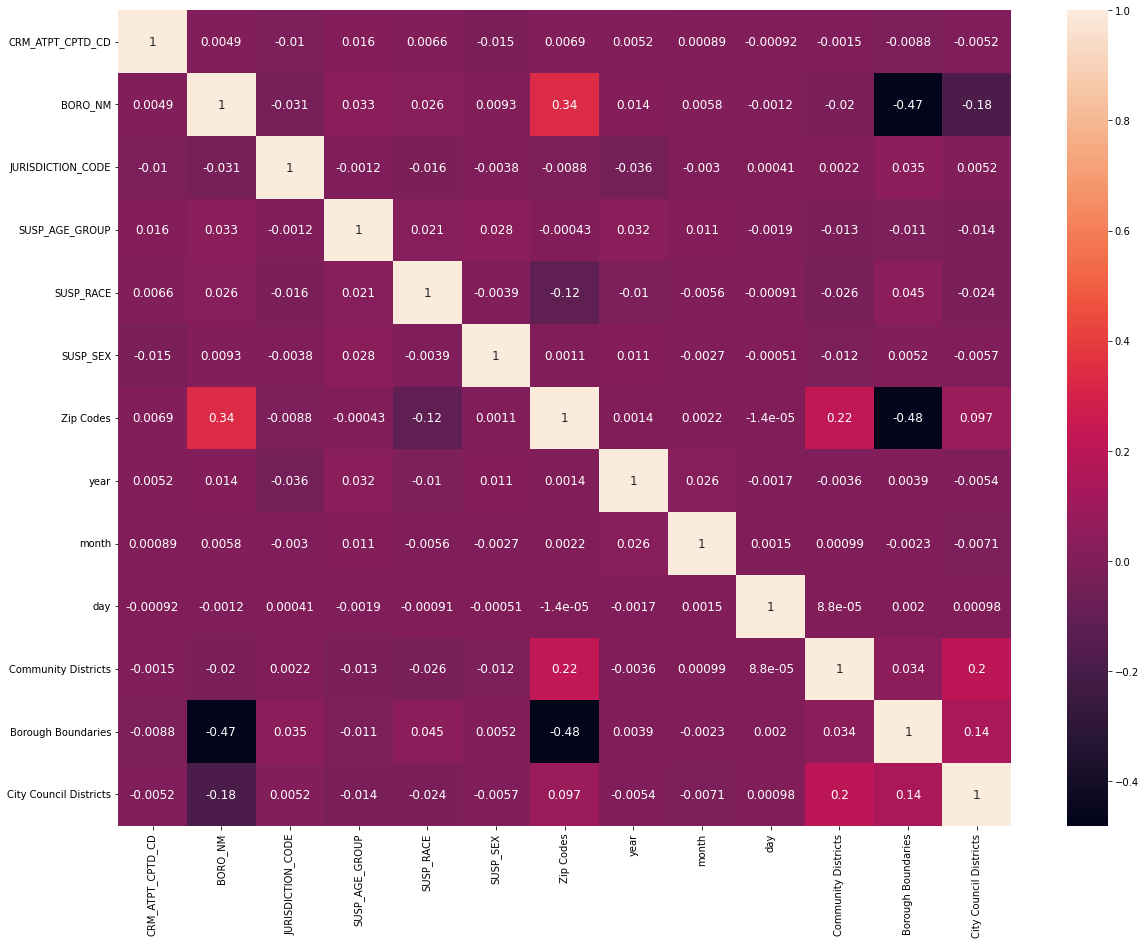

In [0]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,15))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,annot_kws ={"size":12})

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(817520, 13)
(204380, 13)
(817520,)
(204380,)


In [0]:
from sklearn.preprocessing import label_binarize
# Start a new MLflow run
with mlflow.start_run(run_name='gradient_boost') as run:
    model = sklearn.ensemble.GradientBoostingClassifier(random_state=0)
  
    # Models, parameters, and training metrics are tracked automatically
    model.fit(X_train, y_train)

    predicted_probs = model.predict_proba(X_test)
    #print(predicted_probs)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 3
    
    #https://stackoverflow.com/questions/70278059/plotting-the-roc-curve-for-a-multiclass-problem
    y_test_b = label_binarize(y_test, classes=[0, 1, 2])
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    #https://stackoverflow.com/questions/43455407/why-are-the-lengths-of-fprmicro-and-tprmicro-differing-over-multiple-runs    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), predicted_probs.ravel())
    roc_auc_micro = auc(fpr["micro"], tpr["micro"])

    print("AUC of FELONY: {}".format(roc_auc[0]))
    print("AUC of MISDEMEANOR: {}".format(roc_auc[1]))
    print("AUC of VIOLATION: {}".format(roc_auc[2]))
    print("Average ROC AUC: {:.3f}".format(roc_auc_micro))

2023/05/14 08:17:16 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/local_disk0/.ephemeral_nfs/envs/pythonEnv-4943732f-4bb9-4a08-ae71-4d087dcfa48f/lib/python3.9/site-packages/mlflow/models/signature.py:137: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2023/05/14 08:17:22 WARNING mlflow.utils.autologging_utils: MLflow autologging encounter

AUC of FELONY: 0.6130889102478795
AUC of MISDEMEANOR: 0.5812991973567202
AUC of VIOLATION: 0.6455422540666995
Average ROC AUC: 0.692


2023/05/14 07:27:59 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/local_disk0/.ephemeral_nfs/envs/pythonEnv-4943732f-4bb9-4a08-ae71-4d087dcfa48f/lib/python3.9/site-packages/mlflow/models/signature.py:137: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


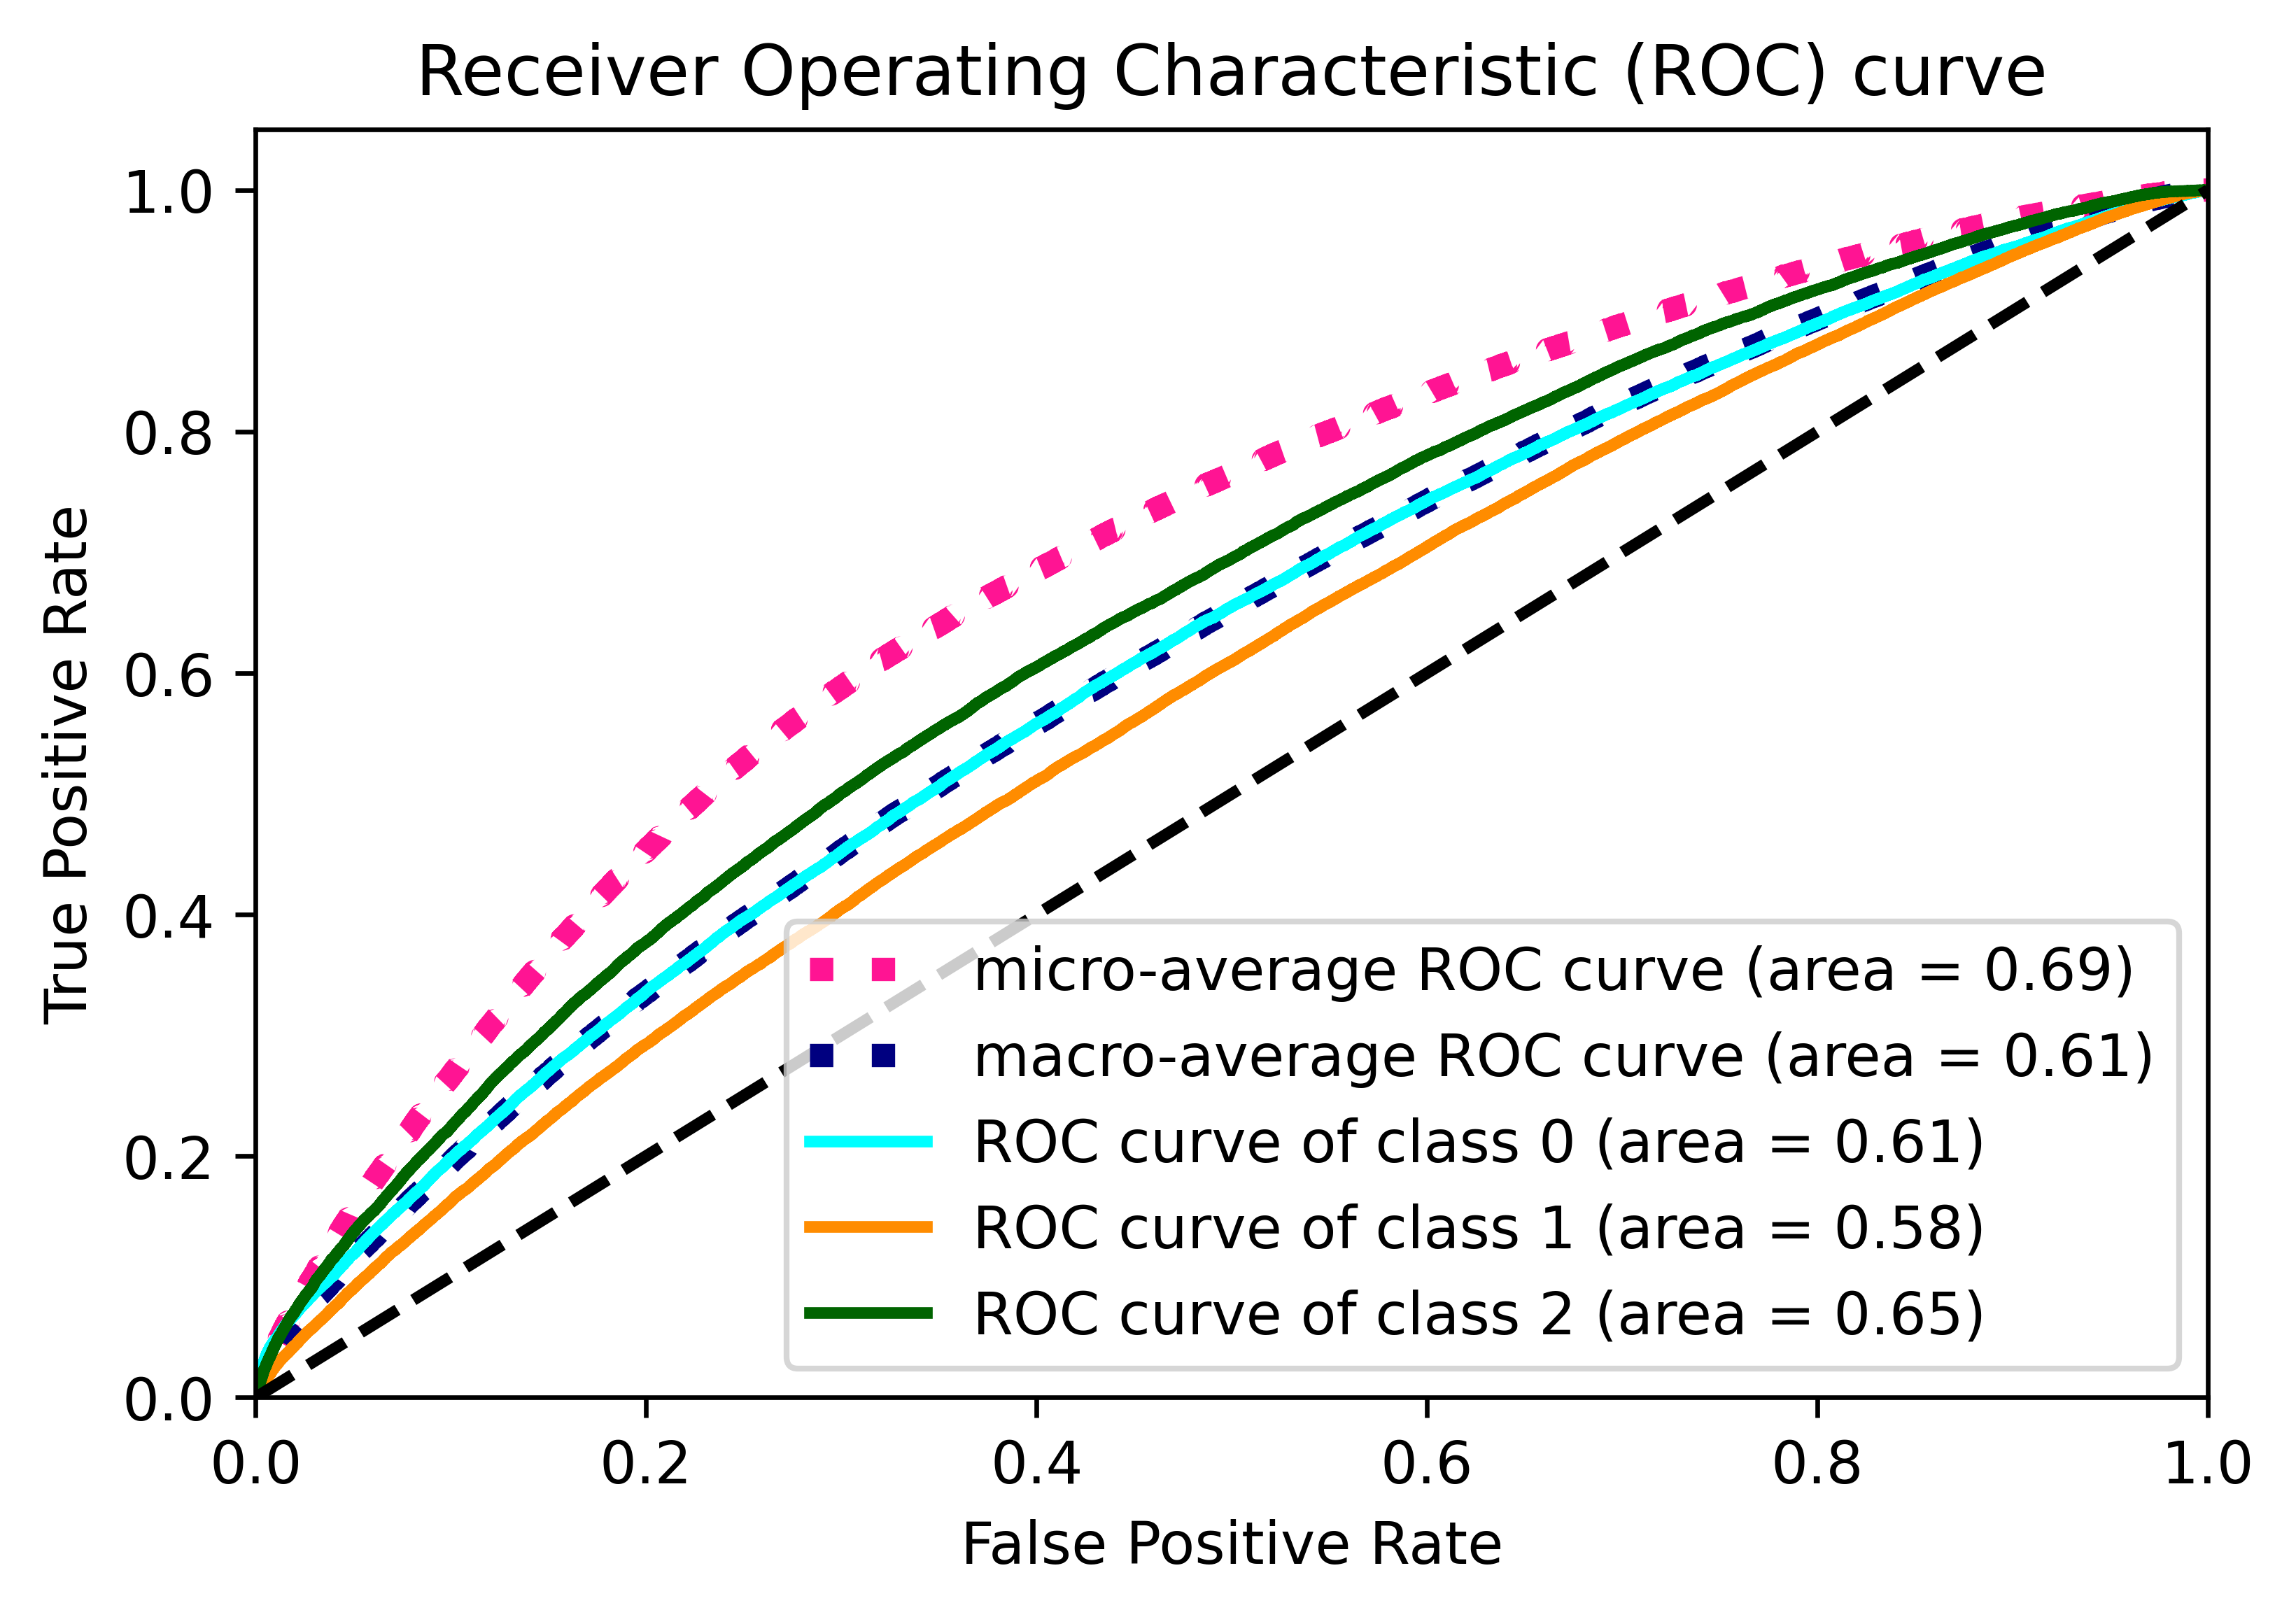

In [0]:
fefrom itertools import cycle
#reference : https://stackoverflow.com/questions/70278059/plotting-the-roc-curve-for-a-multiclass-problem

# Start a new MLflow run
with mlflow.start_run(run_name='gradient_boost') as run:
    model = sklearn.ensemble.GradientBoostingClassifier(random_state=0)
  
    # Models, parameters, and training metrics are tracked automatically
    model.fit(X_train, y_train)

    predicted_probs = model.predict_proba(X_test)
    #print(predicted_probs)

    def plot_roc_curve(y_test, y_pred):
       n_classes = len(np.unique(y_test))
       y_test = label_binarize(y_test, classes=np.arange(n_classes))

       # Compute ROC curve and ROC area for each class
       fpr = dict()
       tpr = dict()
       roc_auc = dict()
       thresholds = dict()

       
       for i in range(n_classes):
         fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_pred[:, i], drop_intermediate=False)
         roc_auc[i] = auc(fpr[i], tpr[i])

       # Compute micro-average ROC curve and ROC area
       fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
       roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

       # First aggregate all false positive rates
       all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

       # Then interpolate all ROC curves at this points
       mean_tpr = np.zeros_like(all_fpr)
       for i in range(n_classes):
         mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

       # Finally average it and compute AUC
       mean_tpr /= n_classes

       fpr["macro"] = all_fpr
       tpr["macro"] = mean_tpr
       roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

       # Plot all ROC curves
       #plt.figure(figsize=(10,5))
       plt.figure(dpi=600)
       lw = 2
       plt.plot(fpr["micro"], tpr["micro"],
       label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
       color="deeppink", linestyle=":", linewidth=4,) 

       plt.plot(fpr["macro"], tpr["macro"],
       label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
       color="navy", linestyle=":", linewidth=4,)

       colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
       for i, color in zip(range(n_classes), colors):
           plt.plot(fpr[i], tpr[i], color=color, lw=lw,
               label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]))

       plt.plot([0, 1], [0, 1], "k--", lw=lw)
       plt.xlim([0.0, 1.0])
       plt.ylim([0.0, 1.05])
       plt.xlabel("False Positive Rate")
       plt.ylabel("True Positive Rate")
       plt.title("Receiver Operating Characteristic (ROC) curve")
       plt.legend()
       plt.show()
    plot_roc_curve(y_test, predicted_probs)

In [0]:
#adding data into dataframe for logistic regression to predict place
df = df2

In [0]:
features2 = ["CRM_ATPT_CPTD_CD", "JURISDICTION_CODE", "Zip Codes","year","month","day"]

In [0]:
labels = df['LAW_CAT_CD']
df = df[features1]

In [0]:
# Define features and target
X = df[features2]
y = df['BORO_NM']


In [0]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=143)


In [0]:
from sklearn.linear_model import LogisticRegression
# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=1000, multi_class='ovr')
logreg.fit(X_train, y_train)

2023/05/14 08:36:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'cd2938b48d234ad08d17b003ca68d1ef', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
/databricks/python/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2023/05/14 08:37:08 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/local_disk0/.ephemeral_nfs/envs/pythonEnv-4943732f-4bb9-4a08-ae71-4d087dcfa48f/lib/python3.9/site-packages/mlflow/models/signature.py:137: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it wil

Out[83]: LogisticRegression(max_iter=1000, multi_class='ovr')

In [0]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model on the testing data

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7084890889519523


/databricks/python/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.70      0.97      0.81     48283
           1       0.64      0.77      0.70     56438
           2       0.96      0.77      0.85     49236
           3       0.57      0.41      0.48     41541
           4       0.00      0.00      0.00      8882

    accuracy                           0.71    204380
   macro avg       0.57      0.58      0.57    204380
weighted avg       0.69      0.71      0.69    204380



/databricks/python/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
